In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Creating a Logistic Regression Model
# Using Multi-Variate Normal Distribution

mean01=np.array([1,0.5])
cov01=np.array([[1.2,0.5],[0.5,1.3]])

mean02=np.array([5,5])
cov02=np.array([[1.2,0.7],[0.7,1.4]])

#For 500 such points
dist01=np.random.multivariate_normal(mean01,cov01,500)
dist02=np.random.multivariate_normal(mean02,cov02,500)

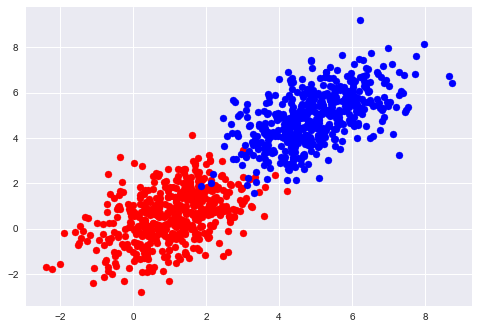

In [31]:
plt.style.use("seaborn")
plt.scatter(dist01[:,0],dist01[:,1],c="red")

plt.scatter(dist02[:,0],dist02[:,1],c="blue")
plt.show()

In [32]:
# Creating a data matrix and then shuffling them
data=np.zeros((1000,3))

In [34]:
data[:500,:2]=dist01
data[500:,:2]=dist02
data[500:,-1]=1.0

In [41]:
np.random.shuffle(data)

In [45]:
X=data[:,:2]

In [46]:
y=data[:,-1]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_test.shape

(200, 2)

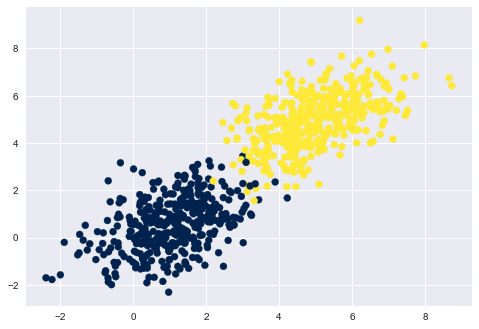

In [63]:
# Plotting the training data and normalizing them
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cividis)
plt.show()

In [68]:
# For unit Standard Deviation and Mean at 0,0
# (X-Mean)/Standard Deviation
X_Mean=np.mean(X_train,axis=0)
X_Std=np.std(X_train,axis=0)

In [69]:
print(X_Mean,X_Std)

[3.01788227 2.76072956] [2.2364872  2.47722091]


In [70]:
X_train=(X_train-X_Mean)/X_Std

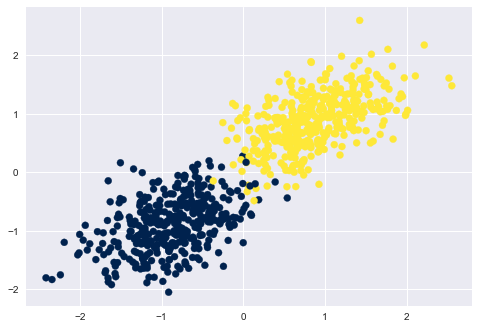

In [72]:
# NOw mean is at 0,0 and SD =1
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cividis)
plt.show()

In [73]:
# Same shift for X_test as well
X_test=(X_test-X_Mean)/X_Std

In [81]:
X_train.mean(axis=0)

array([4.78089790e-16, 8.68749517e-17])

## Logistic Regression implementation

In [102]:
# defining the sigmoid function
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
# Implementing Mathematically
def hypothesis(X,theta):
    '''
    hypotheis func=Summation of (theta*x) from 0 to n
    X - Entire array(m,n+1) 
    theta-np.array(n+1,1)
    theta transpose * X = hypothesis
    '''
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    '''
    params:
    X-array or matrix of the shape(m,n+1)
    y-ouput vector of the same m,1
    theta vector of the shape n+1,1
    return:
      scale_value=loss
    '''
    hi=hypothesis(X,theta)  ## Formula for binary entropy
    # https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy
    e=-1*np.mean(y*np.log(hi)+(1-y)*np.log(1-hi))
    return e

In [110]:
def gradient(X,y,theta):
    '''
    params:
    X-array or matrix of the shape(m,n+1)
    y-ouput vector of the same m,1
    theta vector of the shape n+1,1
    return:
      vector of partial derivatives of theta
      gradient_vector - n+1,1
    '''
    hi=hypothesis(X,theta)
    grad=-np.dot(X.T,(y-hi))
    m=X.shape[0]
    return grad/m

def gradient_descent(X,y,lr=0.5,epoch=500):
    n=X.shape[1]
    theta=np.zeros((n,1))
    error_list=[]
    for i in range(epoch):
        err=error(X,y,theta)
        error_list.append(err)
        grad=gradient(X,y,theta)
        # update
        theta=theta-lr*grad
    return (theta,error_list)
    

In [115]:
ones=np.ones((X_train.shape[0],1))
X_new_train=np.hstack((ones,X_train))
print(X_new_train.shape)
print(X_new_train)
y_train=y_train.reshape(-1,1)

(800, 3)
[[ 1.         -0.02310496 -0.41133211]
 [ 1.          0.71669186  1.41069684]
 [ 1.         -0.72969579 -0.4166002 ]
 ...
 [ 1.         -0.54776894 -0.95833917]
 [ 1.          0.99060123  0.38949861]
 [ 1.          0.94284537  1.57375173]]


In [116]:
theta,error_list=gradient_descent(X_new_train,y_train)

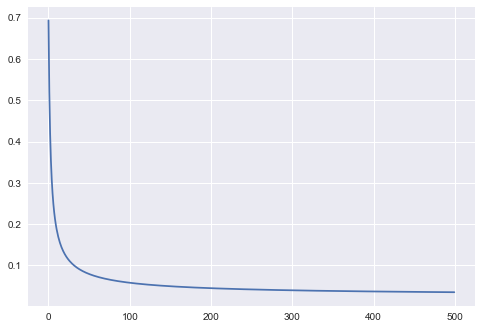

In [117]:
plt.plot(error_list)
plt.show()

In [118]:
theta

array([[0.19574175],
       [3.94326702],
       [3.94762333]])

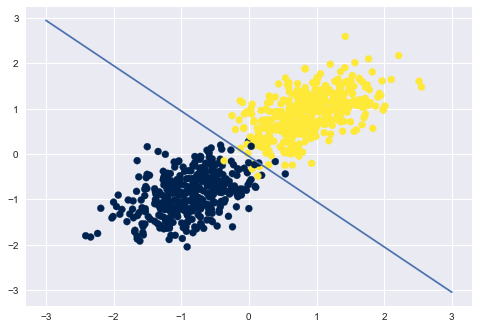

In [119]:
x1=np.arange(-3,4)
x2=-(theta[0]+theta[1]*x1)/theta[2]
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cividis)
plt.plot(x1,x2)
plt.show()

In [120]:
def predict(X,theta):
    h=hypothesis(X,theta)
    output=np.zeros(h.shape)
    output[h>=0.5]=1
    output=output.astype('int')
    return output
X_train_pred=predict(X_new_train,theta)

X_train_pred.shape

(800, 1)

In [121]:
# Using the sklearn Logistic Regression
from sklearn.linear_model import LogisticRegression

In [122]:
model=LogisticRegression()

In [123]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [124]:
model.coef_

array([[3.77438065, 3.69424555]])

In [125]:
model.intercept_

array([0.19661573])

In [126]:
y_pred=model.predict(X_test)

In [130]:
y_pred.shape

(200,)

In [131]:
model.predict([[2,3]])

array([1.])

In [132]:
model.predict([[0,-1]])

array([0.])

In [93]:
# Visualizing the Sigmoid Function
a=np.linspace(-10,10,100)

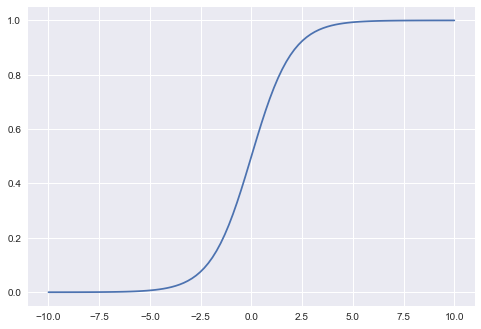

In [95]:
plt.plot(a,sigmoid(a))
plt.show()